In [1]:
import pandas as pd
import numpy as np

In [2]:
# credit to https://www.datacamp.com/community/tutorials/web-scraping-using-python
# The urllib.request module is used to open URLs. The Beautiful Soup package is used to extract data from html files.
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [4]:
# Extract the specific table required from the web page html
tables = soup.find_all('table', attrs={"class": "wikitable sortable"})                           

In [5]:
#Extract the rows from the table
for row in tables:
    row_td = row.find_all('tr')
type(row_td)

bs4.element.ResultSet

In [6]:
#Remove html coding from the rows and convcert to a string
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
type(cleantext)

str

In [7]:
#Split string up in relevant rows
list_rows = cleantext.split("\n,")

In [8]:
#Convert string rows into a dataframe
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[\nPostal Code\n\nBorough\n\nNeighborhood
1,\nM1A\n\nNot assigned\n\n
2,\nM2A\n\nNot assigned\n\n
3,\nM3A\n\nNorth York\n\nParkwoods
4,\nM4A\n\nNorth York\n\nVictoria Village
5,"\nM5A\n\nDowntown Toronto\n\nRegent Park, Har..."
6,"\nM6A\n\nNorth York\n\nLawrence Manor, Lawren..."
7,"\nM7A\n\nDowntown Toronto\n\nQueen's Park, On..."
8,\nM8A\n\nNot assigned\n\n
9,"\nM9A\n\nEtobicoke\n\nIslington Avenue, Humbe..."


In [9]:
# Split up cells in each row
df1 = df[0].str.split('\n', expand=True)
df1.head(5)


,0,1,2,3,4,5,6
0,[,Postal Code,,Borough,,Neighborhood,None
1,,M1A,,Not assigned,,,None
2,,M2A,,Not assigned,,,None
3,,M3A,,North York,,Parkwoods,None
4,,M4A,,North York,,Victoria Village,None


Drop Extra Columns

In [10]:
df2 = df1.drop([df1.index[0],df1.index[2],df1.index[4],df1.index[6]], axis=1)
df2.head(5)

,1,3,5
0,Postal Code,Borough,Neighborhood
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


Rename Columns

In [11]:
df2.rename(columns={1: 'Postal Code', 3: 'Borough', 5: 'Neighborhood'}, inplace=True)
df2.head(5)

,Postal Code,Borough,Neighborhood
0,Postal Code,Borough,Neighborhood
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


Drop Unneeded Rows

In [12]:
df3 = df2.drop(df2.index[0])
df4 = df3[df3.Borough != 'Not assigned']
df4.head(5)

,Postal Code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [13]:
# Reset the index
df5 = df4.reset_index()
list(df5.columns) 

['index', 'Postal Code', 'Borough', 'Neighborhood']

In [14]:
# Remove the old index
df5.drop('index', axis=1, inplace=True)
df5.head(5)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [15]:
df5.shape

(103, 3)

In [16]:
# Pull in the csv with geospatial data
postCode = pd.read_csv('Geospatial_Coordinates.csv')
postCode.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [17]:
# Perform a merge of the tables
merged_left = pd.merge(left=df5, right=postCode, how='left', left_on='Postal Code', right_on='Postal Code')
merged_left.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

!python -m pip install folium
!pip install branca
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

In [61]:
address = 'Toronto'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6541737, -79.38081164513409.


In [79]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(merged_left['Latitude'], merged_left['Longitude'], merged_left['Borough'], merged_left['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Focus on the North York Borough of Toronto

In [80]:
northYork_data = merged_left[merged_left['Borough'] == 'North York'].reset_index(drop=True)
northYork_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills,43.745906,-79.352188
4,M6B,North York,Glencairn,43.709577,-79.445073


In [81]:
address = 'North York'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North York, Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of North York, Toronto are 43.7543263, -79.44911696639593.


In [82]:
# create map of North York using latitude and longitude values
map_northYork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(northYork_data['Latitude'], northYork_data['Longitude'], northYork_data['Borough'], northYork_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_northYork)  
    
map_northYork

## Setup the Foursquare Method

In [83]:
CLIENT_ID = 'PSJJAAYGQ3JNLQYOIEWOHLHYYMGEWGO3PPLQQNS5C2DC5YVY' # your Foursquare ID
CLIENT_SECRET = '2DFU4VZ11BC4MBRTRHIDAMMWUBSJOJTM2WENUY3ONUO21JNC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PSJJAAYGQ3JNLQYOIEWOHLHYYMGEWGO3PPLQQNS5C2DC5YVY
CLIENT_SECRET:2DFU4VZ11BC4MBRTRHIDAMMWUBSJOJTM2WENUY3ONUO21JNC


In [84]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Get the Nearby Venues for each Neighborhood in North York

In [85]:
northYork_venues = getNearbyVenues(names=northYork_data['Neighborhood'],
                                   latitudes=northYork_data['Latitude'],
                                   longitudes=northYork_data['Longitude']
                                  )

Parkwoods
Victoria Village
Lawrence Manor, Lawrence Heights
Don Mills
Glencairn
Don Mills
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Fairview, Henry Farm, Oriole
Northwood Park, York University
Bayview Village
Downsview
York Mills, Silver Hills
Downsview
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Willowdale, Newtonbrook
Downsview
Bedford Park, Lawrence Manor East
Humberlea, Emery
Willowdale, Willowdale East
Downsview
York Mills West
Willowdale, Willowdale West


In [86]:
print(northYork_venues.shape)
northYork_venues.head()

(253, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [87]:
northYork_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",19,19,19,19,19,19
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",26,26,26,26,26,26
Don Mills,29,29,29,29,29,29
Downsview,14,14,14,14,14,14
"Fairview, Henry Farm, Oriole",69,69,69,69,69,69
Glencairn,4,4,4,4,4,4
Hillcrest Village,5,5,5,5,5,5
Humber Summit,2,2,2,2,2,2


In [88]:
print('There are {} uniques categories.'.format(len(northYork_venues['Venue Category'].unique())))

There are 106 uniques categories.


# Analyse Each Neighborhood

## One Hot Encoding

In [89]:
# one hot encoding
northYork_onehot = pd.get_dummies(northYork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
northYork_onehot['Neighborhood'] = northYork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [northYork_onehot.columns[-1]] + list(northYork_onehot.columns[:-1])
northYork_onehot = northYork_onehot[fixed_columns]

northYork_onehot.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Park,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Women's Store
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
northYork_onehot.shape

(253, 107)

In [91]:
northYork_grouped = northYork_onehot.groupby('Neighborhood').mean().reset_index()
northYork_grouped

,Neighborhood,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Park,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Women's Store
0,"Bathurst Manor, Wilson Heights, Downsview North",0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.052632,0.000000,0.052632,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.052632,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.052632,0.000000,0.000000,0.000000,0.000000,0.052632,0.0,0.052632,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000
1,Bayview Village,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Bedford Park, Lawrence Manor East",0.0000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.0,0.038462,0.000000,0.000000,0.000000,0.000000,0.076923,0.038462,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.038462,0.038462,0.000000,0.000000,0.0,0.000000,0.000000,0.038462,0.038462,0.000000,0.0,0.076923,0.000000,0.038462,0.038462,0.000000,0.000000,0.

In [92]:
northYork_grouped.shape

(20, 107)

# Time to Cluster the Neighborhoods

In [93]:
num_top_venues = 5

for hood in northYork_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = northYork_grouped[northYork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor, Wilson Heights, Downsview North----
           venue  freq
0    Coffee Shop  0.11
1           Bank  0.11
2  Deli / Bodega  0.05
3  Shopping Mall  0.05
4          Diner  0.05


----Bayview Village----
                 venue  freq
0   Chinese Restaurant  0.25
1                 Bank  0.25
2                 Café  0.25
3  Japanese Restaurant  0.25
4    Accessories Store  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0         Coffee Shop  0.08
1          Restaurant  0.08
2      Sandwich Place  0.08
3    Sushi Restaurant  0.08
4  Italian Restaurant  0.08


----Don Mills----
                 venue  freq
0          Coffee Shop  0.07
1     Asian Restaurant  0.07
2           Restaurant  0.07
3  Japanese Restaurant  0.07
4                  Gym  0.07


----Downsview----
           venue  freq
0           Park  0.14
1  Grocery Store  0.14
2           Bank  0.07
3       Bus Stop  0.07
4    Snack Place  0.07


----Fairview, Henry Farm, Oriole----
   

In [94]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [95]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = northYork_grouped['Neighborhood']

for ind in np.arange(northYork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(northYork_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Middle Eastern Restaurant,Pharmacy,Pizza Place,Deli / Bodega,Ice Cream Shop,Bridal Shop,Restaurant,Diner
1,Bayview Village,Japanese Restaurant,Chinese Restaurant,Café,Bank,Discount Store,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega
2,"Bedford Park, Lawrence Manor East",Coffee Shop,Restaurant,Sandwich Place,Sushi Restaurant,Italian Restaurant,Comfort Food Restaurant,Pharmacy,Ice Cream Shop,Cupcake Shop,Butcher
3,Don Mills,Gym,Coffee Shop,Asian Restaurant,Japanese Restaurant,Restaurant,Beer Store,Chinese Restaurant,Concert Hall,Clothing Store,Italian Restaurant
4,Downsview,Park,Grocery Store,Bank,Liquor Store,Bus Stop,Snack Place,Gym / Fitness Center,Baseball Field,Hotel,Food Truck


In [96]:
# set number of clusters
kclusters = 5

northYork_grouped_clustering = northYork_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(northYork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3])

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

northYork_merged = northYork_data

# merge northYork_grouped with northYork_data to add latitude/longitude for each neighborhood
northYork_merged = northYork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

northYork_merged.head() # check the last columns!

# Create a Map showing the Clustered Neighborhoods

In [99]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(northYork_merged['Latitude'], northYork_merged['Longitude'], northYork_merged['Neighborhood'], northYork_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

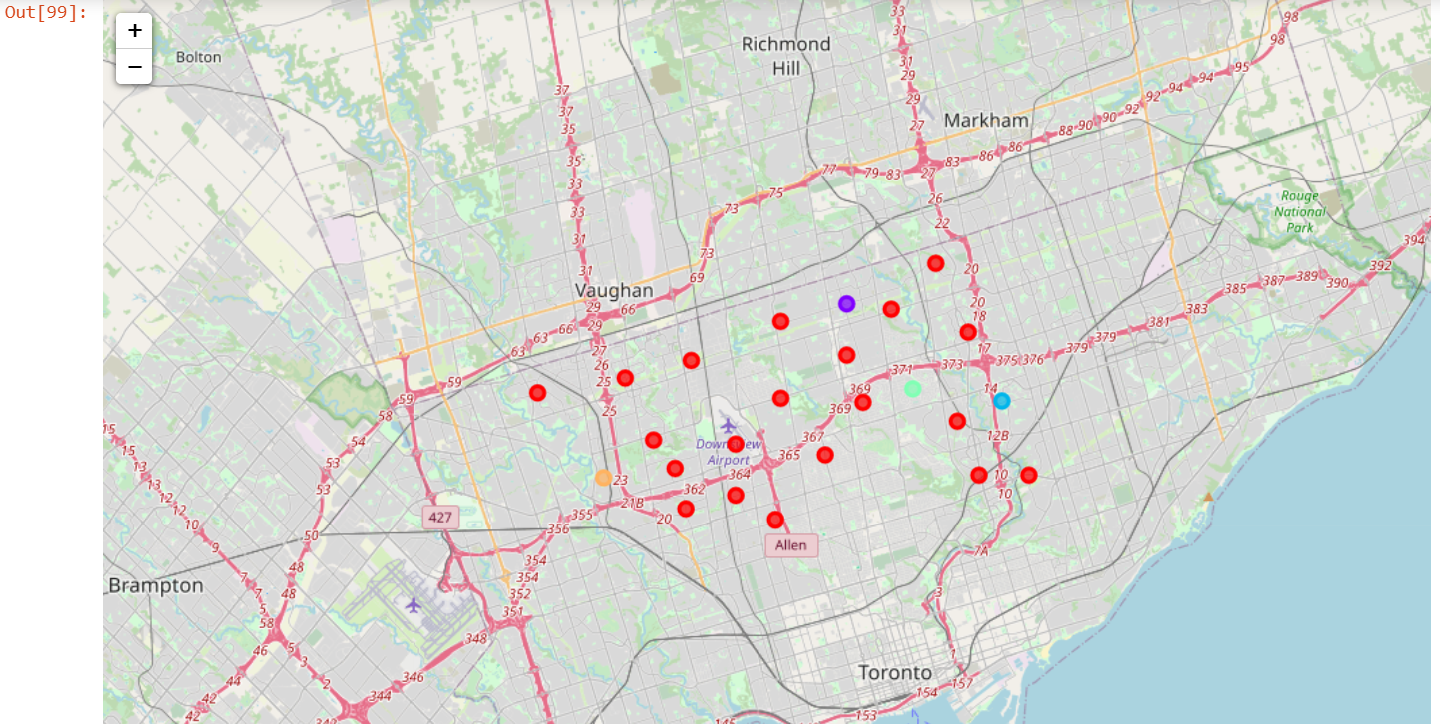